## Importing all the required libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
from itertools import chain
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Reading the dataset

In [7]:
/pwd

'C:\\Users\\Checkout\\Downloads'

In [3]:
dir = "C:/Users/pruth/Downloads/project/"
Food_Ratings = pd.read_csv(dir+'RAW_interactions.csv')
Food_Recipes = pd.read_csv(dir+'RAW_recipes.csv')
Food_pp_users = pd.read_csv(dir+'PP_users.csv')
Food_pp_recipes = pd.read_csv(dir+'PP_recipes.csv')
Food_interactions_validation = pd.read_csv(dir+'interactions_validation.csv')
Food_interactions_train = pd.read_csv(dir+'interactions_train.csv')
Food_interactions_test = pd.read_csv(dir+'interactions_test.csv')

## Preprocessing/EDA

In [4]:
Food_Recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
Food_Ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [6]:
Food_Ratings.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

In [7]:
Food_Recipes.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [8]:
Food_Recipes.dropna(inplace=True)

In [9]:
Food_Recipes.isna().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [6]:
# WordCloud of the decription column

In [10]:
allwords = " ".join(Food_Recipes["description"])

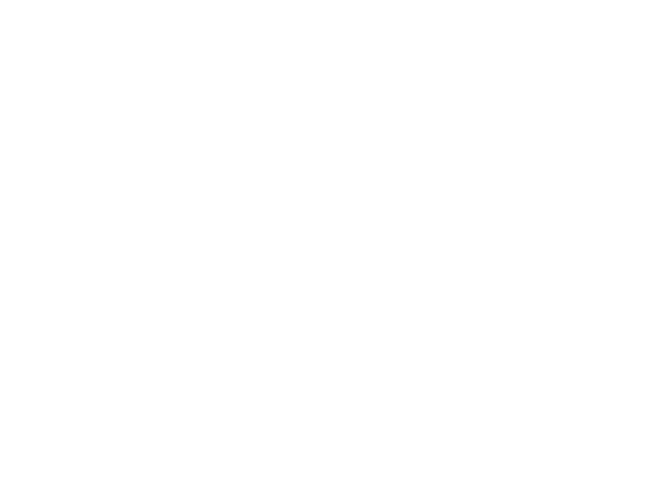

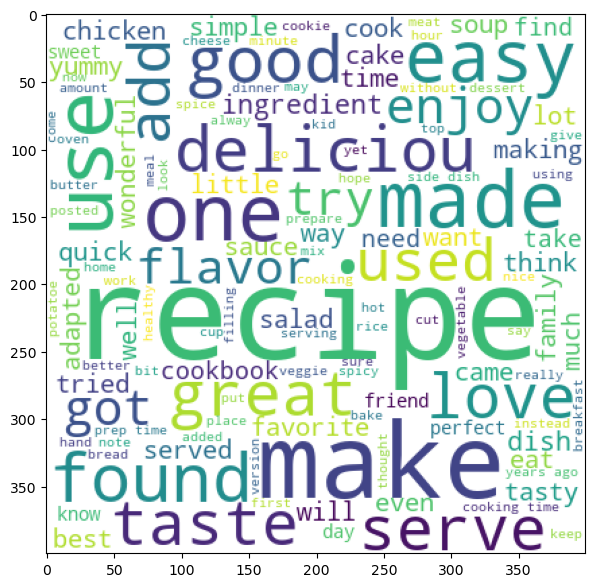

In [11]:
wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 

plt.show()

## Importing the libraries required for Embedding and Neural Networks

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Embedding, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras
from keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from keras import regularizers
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [14]:
Food_Recipes["description"].isna().sum()

0

In [15]:
vectorizer = TfidfVectorizer(max_features = 1000)

# fit the vectorizer on the documents to create the term-document matrix
X = vectorizer.fit_transform(Food_Recipes["description"])

# create a TruncatedSVD instance with the desired number of components
lsa = TruncatedSVD(n_components=100)

# fit the LSA model on the term-document matrix to generate embeddings
embeddings = lsa.fit_transform(X)
embeddings.shape

(226657, 100)

In [16]:
embeddings = pd.DataFrame(embeddings)
Food_Recipes2 = pd.concat([Food_Recipes, embeddings], axis=1)

In [17]:
Food_Recipes2.dropna(inplace= True)

In [18]:
Food_Recipes2.id = Food_Recipes2.id.astype('int')

### Merging two datasets raw_interactions and raw_recipes on recipe_id for embedding the description

In [19]:
FoodRatings_merge = pd.merge(Food_Ratings,Food_Recipes2.rename(columns = {'id':'recipe_id'}),on='recipe_id',how='left')
FoodRatings_merge.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,90,91,92,93,94,95,96,97,98,99
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,-0.035307,-0.063383,0.064998,-0.035071,-0.000654,0.023294,-0.040405,0.033900,-0.012999,0.060714
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495.0,1533.0,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,-0.035307,-0.063383,0.064998,-0.035071,-0.000654,0.023294,-0.040405,0.033900,-0.012999,0.060714
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,0.000269,0.018464,0.015813,0.001940,-0.100744,-0.057357,-0.015353,0.033562,0.018343,0.000961
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10.0,64342.0,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...",...,0.000269,0.018464,0.015813,0.001940,-0.100744,-0.057357,-0.015353,0.033562,0.018343,0.000961


In [20]:
FoodRatings_merge.isna().sum()

user_id          0
recipe_id        0
date             0
rating           0
review         169
             ...  
95           49358
96           49358
97           49358
98           49358
99           49358
Length: 116, dtype: int64

In [21]:
Food_Ratings.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

### Dropping all the unnecessary columns from the merged dataframe

In [22]:
Food_Ratings_final = FoodRatings_merge.drop(['description','review','date', 'name', 'minutes', 'contributor_id', 'submitted', 'tags', 'nutrition', 'n_steps', 'steps', 'ingredients', 'n_ingredients'], axis=1)

In [23]:
Food_Ratings_final.isna().sum()

user_id          0
recipe_id        0
rating           0
0            49358
1            49358
             ...  
95           49358
96           49358
97           49358
98           49358
99           49358
Length: 103, dtype: int64

In [24]:
# Dropping the rows that have nan values
Food_Ratings_final.dropna(inplace=True)

In [25]:
Food_Ratings_final.isna().sum()

user_id      0
recipe_id    0
rating       0
0            0
1            0
            ..
95           0
96           0
97           0
98           0
99           0
Length: 103, dtype: int64

In [3]:
# Converting the user_id and rating_id into categorical so that it can be label encoded. 

In [26]:
Food_Ratings_final['user_id'] = pd.Categorical(Food_Ratings_final['user_id'])
Food_user = Food_Ratings_final['user_id'].cat.codes
Food_Ratings_final['recipe_id'] = pd.Categorical(Food_Ratings_final['recipe_id'])
Food_recipe = Food_Ratings_final['recipe_id'].cat.codes
training_output = Food_Ratings_final['rating']

In [27]:
Food_Ratings_final.drop(columns = ['user_id','recipe_id','rating'],inplace=True)

In [28]:
user_id = Food_user.max() 
recipe_id = Food_recipe.max()
recipe_input_dim = 1
user_input_dim = 1
Food_Ratings_final_dim = Food_Ratings_final.shape[1]

recipe_id,user_id,recipe_input_dim,user_input_dim,Food_Ratings_final_dim

(221760, 219393, 1, 1, 100)

In [29]:
Food_Ratings_final_dim

100

In [30]:
Food_user.max(),Food_recipe.max()

(219393, 221760)

In [31]:
#Embedding layer for users
users_input = Input(shape=(user_input_dim,))
embedding_layer_users = Embedding(user_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(users_input)#Embedding layer
embedding_output_users = Flatten()(embedding_layer_users)

#Embedding layer for recipe
recipe_input = Input(shape=(recipe_input_dim,))
embedding_layer_recipe = Embedding(recipe_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(recipe_input)#Embedding layer
embedding_output_recipe = Flatten()(embedding_layer_recipe)


# #Embedding layer for Final_Ratings that ie., the metadata
meta_input = Input(shape=(Food_Ratings_final_dim,), name='metadata_input')#1st Input Layer
dense_layer = Dense(64, activation='relu')(meta_input)
metadata_embedding = Dense(10, activation='relu',name='metadata_embedding')(dense_layer)

#Concatination and Dense layer
Merged_Embeddings = Concatenate()([embedding_output_recipe, embedding_output_users,metadata_embedding])
hidden_layer = Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0))(Merged_Embeddings)

output_layer = Dense(1, kernel_initializer='lecun_uniform')(hidden_layer)

model = tf.keras.Model([recipe_input, users_input,meta_input], output_layer) #

In [32]:
# Model Optimizer
optimizer = Adam(lr=1e-3, epsilon = 1e-7, amsgrad=True)
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 metadata_input (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 10)        2217610     ['input_1[0][0]']                
                                                                                              

C:\Users\pruth\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
Food_Ratings_final

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.322326,-0.147668,0.130163,-0.113768,-0.008249,0.183759,0.085042,-0.065209,0.061928,0.093852,...,-0.035307,-0.063383,0.064998,-0.035071,-0.000654,0.023294,-0.040405,0.033900,-0.012999,0.060714
1,0.322326,-0.147668,0.130163,-0.113768,-0.008249,0.183759,0.085042,-0.065209,0.061928,0.093852,...,-0.035307,-0.063383,0.064998,-0.035071,-0.000654,0.023294,-0.040405,0.033900,-0.012999,0.060714
3,0.393132,-0.111767,0.169225,-0.020884,-0.051119,-0.064067,0.070653,-0.104138,-0.052185,-0.005312,...,0.000269,0.018464,0.015813,0.001940,-0.100744,-0.057357,-0.015353,0.033562,0.018343,0.000961
4,0.393132,-0.111767,0.169225,-0.020884,-0.051119,-0.064067,0.070653,-0.104138,-0.052185,-0.005312,...,0.000269,0.018464,0.015813,0.001940,-0.100744,-0.057357,-0.015353,0.033562,0.018343,0.000961
5,0.274319,0.046590,-0.061615,-0.131054,0.035333,-0.051255,-0.053934,0.007385,-0.064569,-0.073651,...,0.078805,-0.011042,0.031242,0.116356,0.023554,-0.106705,-0.071317,-0.054020,0.007122,0.011535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132362,0.154672,-0.050240,-0.058881,-0.102118,-0.050438,0.109048,0.008116,-0.044670,-0.031791,-0.003157,...,0.037006,-0.098463,0.001866,-0.095421,-0.114769,-0.093109,0.012543,-0.004808,0.069405,-0.037196
1132363,0.204890,0.004216,-0.036229,-0.071906,0.009781,-0.060187,-0.044289,0.095730,-0.053059,-0.106891,...,0.004769,-0.050150,-0.034808,-0.014086,0.017920,0.023112,-0.008481,-0.015253,0.013451,0.018929
1132364,0.137059,-0.076024,-0.132181,0.183099,0.087173,-0.027240,0.111331,0.057201,0.063239,-0.147928,...,-0.002921,-0.014550,0.007765,-0.013824,-0.020819,-0.010648,-0.005767,0.022173,-0.016378,0.005576
1132365,0.137059,-0.076024,-0.132181,0.183099,0.087173,-0.027240,0.111331,0.057201,0.063239,-0.147928,...,-0.002921,-0.014550,0.007765,-0.013824,-0.020819,-0.010648,-0.005767,0.022173,-0.016378,0.005576


In [34]:
# Splitting the data in 4:1 for train-test
x=800000

In [35]:
# Fit the model to the data

Final_list = [Food_recipe[:x], Food_user[:x],Food_Ratings_final[:x]]

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

Neural_nets = model.fit(
  Final_list, training_output, batch_size=256, epochs=10, 
  verbose=1, callbacks = [early_stopping], validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 33s 13ms/step - loss: 1.9248 - root_mean_squared_error: 1.3874 - val_loss: 1.4824 - val_root_mean_squared_error: 1.2175
Epoch 2/10
2500/2500 [==============================] - 35s 14ms/step - loss: 1.0187 - root_mean_squared_error: 1.0093 - val_loss: 1.6373 - val_root_mean_squared_error: 1.2796
Epoch 3/10
2500/2500 [==============================] - 35s 14ms/step - loss: 0.7144 - root_mean_squared_error: 0.8452 - val_loss: 1.6426 - val_root_mean_squared_error: 1.2816
Epoch 4/10
2500/2500 [==============================] - 36s 14ms/step - loss: 0.6263 - root_mean_squared_error: 0.7914 - val_loss: 1.8412 - val_root_mean_squared_error: 1.3569


In [36]:
Predictions = model.predict([Food_recipe[x:],Food_user[x:],Food_Ratings_final[x:]])

8845/8845 [==============================] - 4s 476us/step


In [37]:
mean_squared_error(Predictions,training_output[x:])

1.8174611127408562

### Neural Network embedded eith sentiment analysis data.

In [38]:
df_interactions_with_senti = pd.read_csv(r"C:\Users\pruth\Downloads\project\df_interactions_with_senti.csv")

In [39]:
df_interactions_with_senti

,Unnamed: 0,user_id,recipe_id,date,rating,review,prob_senti_pos,prob_senti_neu,prob_senti_neg
0,0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,0.244645,0.510024,0.245331
1,1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",0.212580,0.541937,0.245482
2,2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,0.217615,0.504000,0.278385
3,3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,0.217029,0.562159,0.220812
4,4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",0.245181,0.516963,0.237855
...,...,...,...,...,...,...,...,...,...
199995,199995,486888,33671,2009-01-17,5,DH said he could just drink the gravy or eat i...,0.290039,0.504268,0.205692
199996,199996,1133067,33671,2009-01-17,0,"Wow! at 53 grams of fat per person, no WONDER...",0.214188,0.543682,0.242130
199997,199997,227456,33671,2009-01-18,5,FANTASTIC! What else needs to be said. I bou...,0.222121,0.489666,0.288212
199998,199998,335606,33671,2009-01-19,4,Very easy and fall off the bone tender. My on...,0.273133,0.514271,0.212596


In [5]:
# Merging the sentiment data with the ratings data

In [40]:
FoodRatings_merge = pd.merge(Food_Ratings,df_interactions_with_senti,how='right', left_on=['user_id','recipe_id'], right_on = ['user_id','recipe_id'])
FoodRatings_merge.head()

,user_id,recipe_id,date_x,rating_x,review_x,Unnamed: 0,date_y,rating_y,review_y,prob_senti_pos,prob_senti_neu,prob_senti_neg
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,0,2003-02-17,4,Great with a salad. Cooked on top of stove for...,0.244645,0.510024,0.245331
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",1,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",0.212580,0.541937,0.245482
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,2,2002-12-01,4,This worked very well and is EASY. I used not...,0.217615,0.504000,0.278385
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,3,2010-02-27,5,I made the Mexican topping and took it to bunk...,0.217029,0.562159,0.220812
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",4,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",0.245181,0.516963,0.237855


In [41]:
Food_Ratings_final = FoodRatings_merge.copy()
training_output = Food_Ratings_final['rating_x']

In [42]:
Food_Ratings_final.drop(columns = ["date_x","date_y","review_x","review_y","rating_x","rating_y","Unnamed: 0"],inplace=True)

In [43]:
Food_Ratings_final

,user_id,recipe_id,prob_senti_pos,prob_senti_neu,prob_senti_neg
0,38094,40893,0.244645,0.510024,0.245331
1,1293707,40893,0.212580,0.541937,0.245482
2,8937,44394,0.217615,0.504000,0.278385
3,126440,85009,0.217029,0.562159,0.220812
4,57222,85009,0.245181,0.516963,0.237855
...,...,...,...,...,...
199995,486888,33671,0.290039,0.504268,0.205692
199996,1133067,33671,0.214188,0.543682,0.242130
199997,227456,33671,0.222121,0.489666,0.288212
199998,335606,33671,0.273133,0.514271,0.212596


In [44]:
Food_Ratings_final.isna().sum()

user_id           0
recipe_id         0
prob_senti_pos    0
prob_senti_neu    0
prob_senti_neg    0
dtype: int64

In [4]:
# Similar to the above neural network with description, converting the user_id and recipe_id to categorical labels

In [45]:
Food_Ratings_final['user_id'] = pd.Categorical(Food_Ratings_final['user_id'])
Food_user = Food_Ratings_final['user_id'].cat.codes
Food_Ratings_final['recipe_id'] = pd.Categorical(Food_Ratings_final['recipe_id'])
Food_recipe = Food_Ratings_final['recipe_id'].cat.codes


In [46]:
Food_Ratings_final

,user_id,recipe_id,prob_senti_pos,prob_senti_neu,prob_senti_neg
0,38094,40893,0.244645,0.510024,0.245331
1,1293707,40893,0.212580,0.541937,0.245482
2,8937,44394,0.217615,0.504000,0.278385
3,126440,85009,0.217029,0.562159,0.220812
4,57222,85009,0.245181,0.516963,0.237855
...,...,...,...,...,...
199995,486888,33671,0.290039,0.504268,0.205692
199996,1133067,33671,0.214188,0.543682,0.242130
199997,227456,33671,0.222121,0.489666,0.288212
199998,335606,33671,0.273133,0.514271,0.212596


In [47]:
Food_Ratings_final = Food_Ratings_final.drop(columns = ["user_id","recipe_id"])

In [48]:
user_id = Food_user.max() 
recipe_id = Food_recipe.max()
recipe_input_dim = 1
user_input_dim = 1
Food_Ratings_final_dim = Food_Ratings_final.shape[1]

recipe_id,user_id,recipe_input_dim,user_input_dim,Food_Ratings_final_dim

(40792, 63377, 1, 1, 3)

In [49]:
Food_user.max(),Food_recipe.max()

(63377, 40792)

In [50]:
Food_Ratings_final_dim

3

In [51]:
#Embedding layer for users
users_input = Input(shape=(user_input_dim,))
embedding_layer_users = Embedding(user_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(users_input)
embedding_output_users = Flatten()(embedding_layer_users)

#Embedding layer for recipe
recipe_input = Input(shape=(recipe_input_dim,))
embedding_layer_recipe = Embedding(recipe_id+1 ,10, embeddings_regularizer=regularizers.L2(0))(recipe_input)
embedding_output_recipe = Flatten()(embedding_layer_recipe)


# #Embedding layer for meta data
meta_input = Input(shape=(Food_Ratings_final_dim,), name='metadata_input')
dense_layer = Dense(64, activation='relu')(meta_input)
metadata_embedding = Dense(10, activation='relu',name='metadata_embedding')(dense_layer)

#Concatination and Dense layer
Merged_Embeddings = Concatenate()([embedding_output_recipe, embedding_output_users,metadata_embedding])# metadata_embedding
hidden_layer = Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0))(Merged_Embeddings)

output_layer = Dense(1, kernel_initializer='lecun_uniform')(hidden_layer)

model2 = tf.keras.Model([recipe_input, users_input,meta_input], output_layer) #

In [52]:
#Model compilation

optimizer = Adam(lr=1e-3, epsilon = 1e-7, amsgrad=True) #epsilon = decay rate
model2.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 metadata_input (InputLayer)    [(None, 3)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 10)        407930      ['input_3[0][0]']                
                                                                                            

C:\Users\pruth\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [53]:
training_output

0         4
1         5
2         4
3         5
4         5
         ..
199995    5
199996    0
199997    5
199998    4
199999    5
Name: rating_x, Length: 200000, dtype: int64

In [54]:
x=180000
Food_recipe.shape, Food_user.shape,Food_Ratings_final.shape

((200000,), (200000,), (200000, 3))

In [55]:
Final_list = [Food_recipe[:x], Food_user[:x],Food_Ratings_final[:x]]

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

Neural_nets = model2.fit(
  Final_list, training_output, batch_size=256, epochs=10, 
  verbose=1, callbacks = [early_stopping], validation_split=0.2
)

Epoch 1/10
563/563 [==============================] - 3s 4ms/step - loss: 3.6390 - root_mean_squared_error: 1.9076 - val_loss: 1.5783 - val_root_mean_squared_error: 1.2563
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 1.2388 - root_mean_squared_error: 1.1130 - val_loss: 1.6513 - val_root_mean_squared_error: 1.2850
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.8455 - root_mean_squared_error: 0.9195 - val_loss: 1.8926 - val_root_mean_squared_error: 1.3757
Epoch 4/10
563/563 [==============================] - 3s 5ms/step - loss: 0.5966 - root_mean_squared_error: 0.7724 - val_loss: 2.0403 - val_root_mean_squared_error: 1.4284


In [56]:
Predictions = model2.predict([Food_recipe[x:],Food_user[x:],Food_Ratings_final[x:]])

625/625 [==============================] - 0s 539us/step


In [57]:
mean_squared_error(Predictions,FoodRatings_merge["rating_x"][x:])

1.990440783733534

In [58]:
Predictions

array([[4.223145 ],
       [2.6213355],
       [4.478092 ],
       ...,
       [3.1885448],
       [3.430773 ],
       [2.6262531]], dtype=float32)